In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [3]:
data = pd.read_excel("owid-covid-data.xlsx")

In [64]:
# Filtering for switzerland
swiss_data = data[data['location'] == 'Switzerland']

# only need date & new_cases
swiss_data = swiss_data[['date', 'new_cases']]

swiss_data.head()



,date,new_cases
295631,2020-01-03,0.0
295632,2020-01-04,0.0
295633,2020-01-05,0.0
295634,2020-01-06,0.0
295635,2020-01-07,0.0


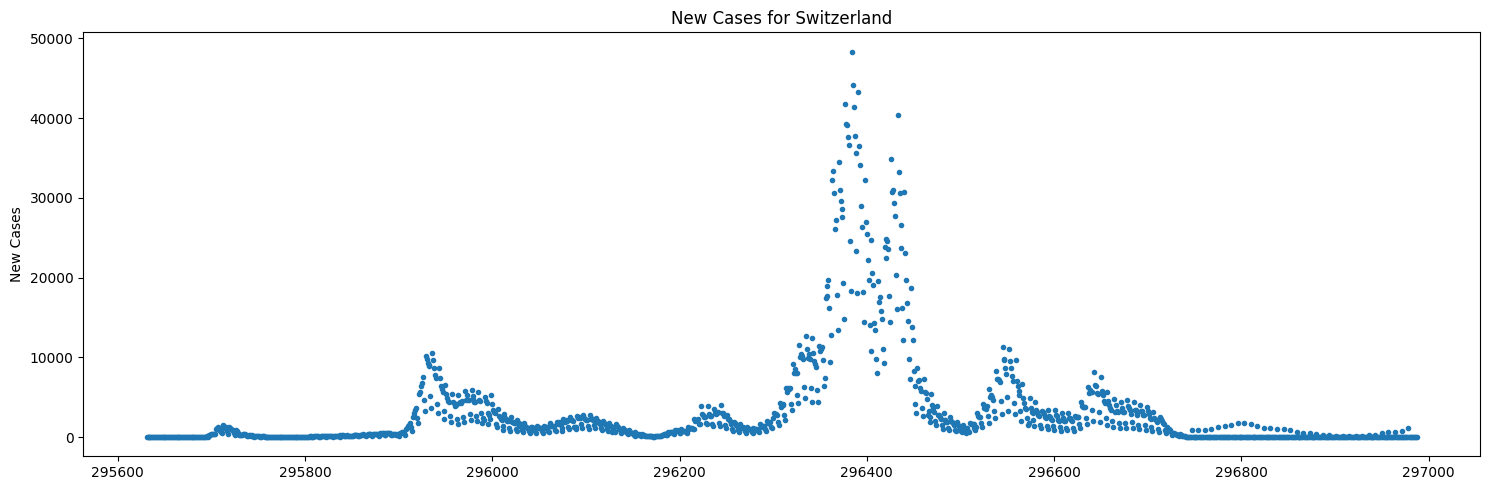

In [65]:
## Plotting Switzerland

plt.figure(figsize=(15, 5))
swiss_data['new_cases'].plot(style='.', title=f'New Cases for Switzerland')
plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

## Data Prep

In [66]:
# missing values?
missing_values_count_before = swiss_data['new_cases'].isnull().sum()
print(missing_values_count_before)


0


## Prophet 

In [67]:
# rename columns into ds & y
swiss_data = swiss_data.rename(columns={'date': 'ds', 'new_cases': 'y'})



# initialize and fit prophet
m = Prophet()
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(swiss_data)

02:52:10 - cmdstanpy - INFO - Chain [1] start processing
02:52:10 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
# setting future dates
future = m.make_future_dataframe(periods=365)
future.tail()



,ds
1717,2024-09-15
1718,2024-09-16
1719,2024-09-17
1720,2024-09-18
1721,2024-09-19


In [69]:
# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
1717,2024-09-15,2760.392421,-11305.509347,16970.778268
1718,2024-09-16,2414.480200,-10672.066932,17065.627571
1719,2024-09-17,5049.263447,-8578.404302,19354.898920
1720,2024-09-18,4480.925770,-9137.297266,18767.155132
1721,2024-09-19,4343.450756,-9565.642502,18846.393742


## Plotting Forecast

/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


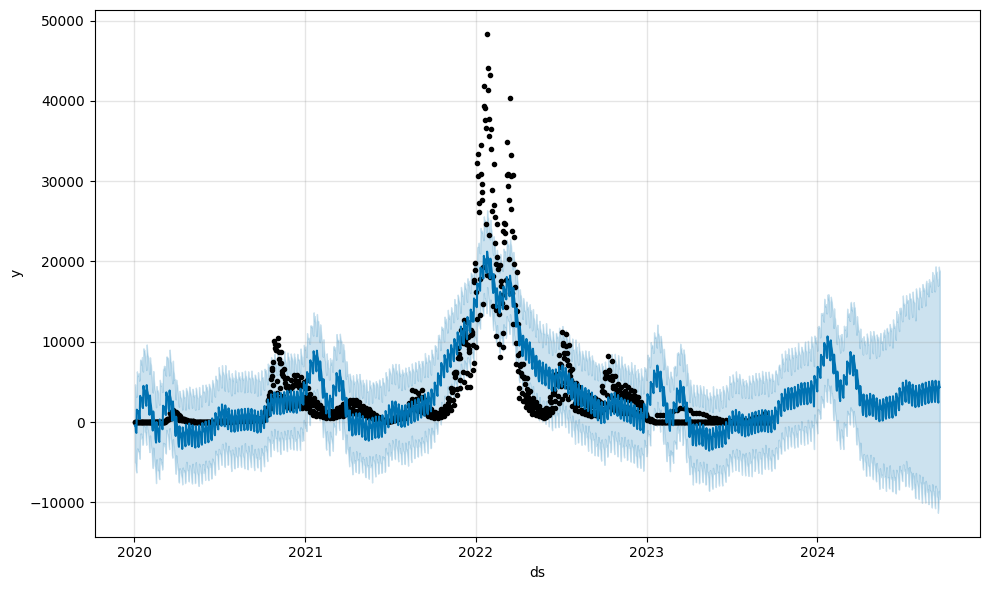

In [70]:
# Python
fig1 = m.plot(forecast)



## Plotting Components

/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

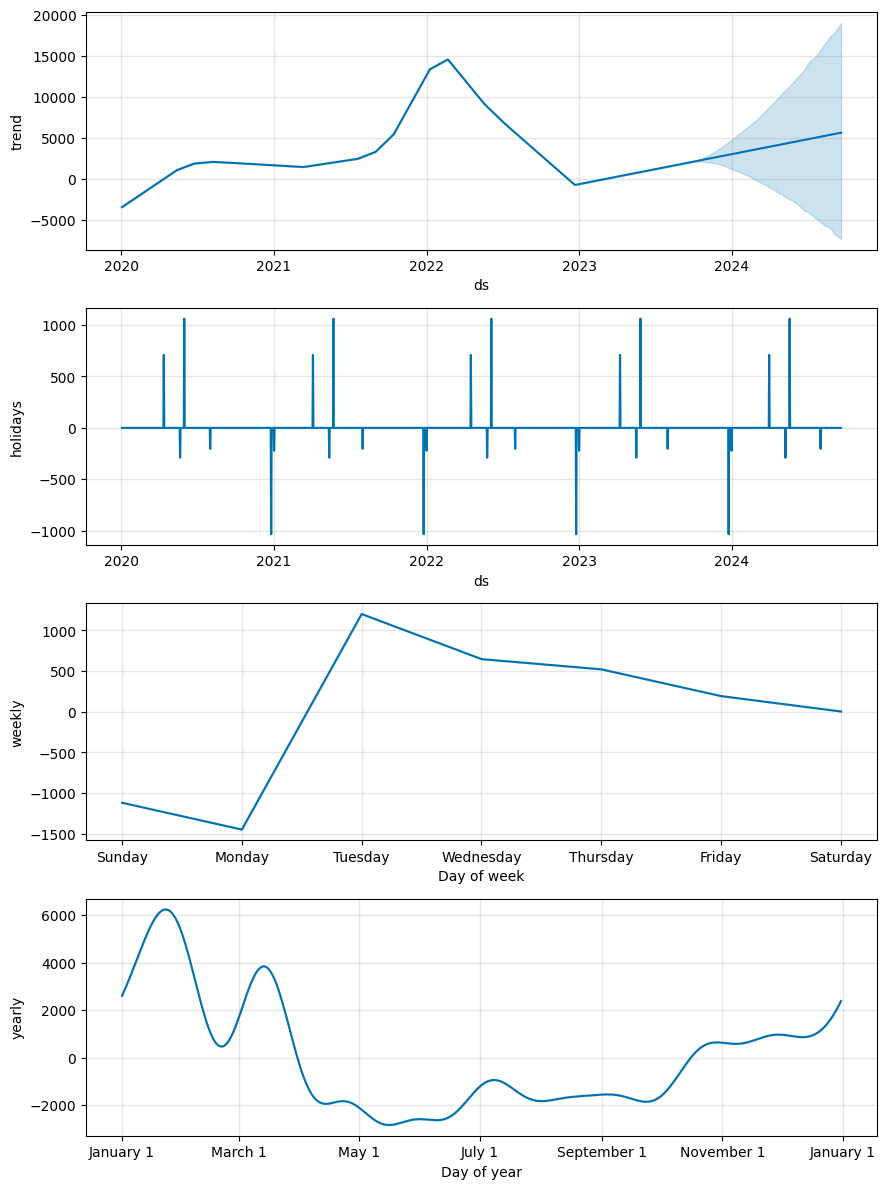

In [71]:
# Python
fig2 = m.plot_components(forecast)

## Looking at Holidays included

In [72]:
m.train_holiday_names


0    New Year's Day
1     Easter Sunday
2     Ascension Day
3       Whit Sunday
4      National Day
5     Christmas Day
dtype: object